<a href="https://colab.research.google.com/github/jibbsmathew/QCM_Alcohol/blob/main/Alcohol_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os, sys, itertools, re


In [ ]:
if 'google.colab' in sys.modules:
    project_path =  "/content/drive/My Drive/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

Mounted at /content/drive/
/content/drive/My Drive


In [ ]:
# Load training data prepared previuosly

df1 = pd.read_csv('QCM3.csv')
df2 = pd.read_csv('QCM6.csv')
df3 = pd.read_csv('QCM7.csv')
df4 = pd.read_csv('QCM10.csv')
df5 = pd.read_csv('QCM12.csv')

In [ ]:
df1

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,0
5,-75.61,-64.10,-122.08,-102.17,-174.79,-145.50,-214.69,-177.30,-250.83,-207.99,1
6,-76.28,-64.53,-123.40,-103.06,-174.74,-144.98,-206.75,-170.68,-240.14,-200.05,1
7,-76.96,-65.37,-124.50,-103.87,-169.93,-140.56,-200.89,-165.88,-232.82,-194.70,1
8,-78.29,-66.49,-125.78,-104.77,-165.42,-136.17,-196.10,-161.99,-226.89,-189.57,1
9,-79.62,-66.85,-126.61,-104.38,-162.73,-133.26,-194.87,-160.68,-221.33,-183.81,1


In [ ]:
feature=["0.799_0.201","0.799_0.201.1","0.700_0.300","0.700_0.300.1","0.600_0.400","0.600_0.400.1","0.501_0.499","0.501_0.499.1","0.400_0.600","0.400_0.600.1"]

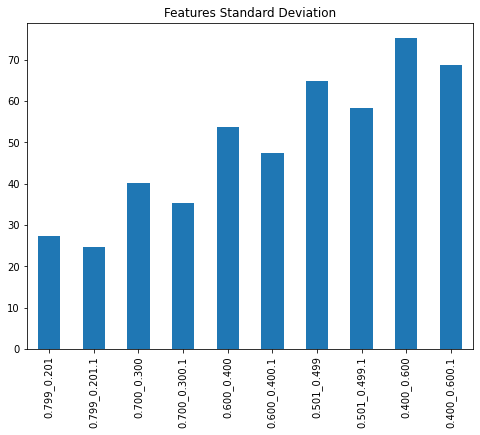

In [ ]:
#plot and compare the standard deviation of input features:

df1[feature].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")


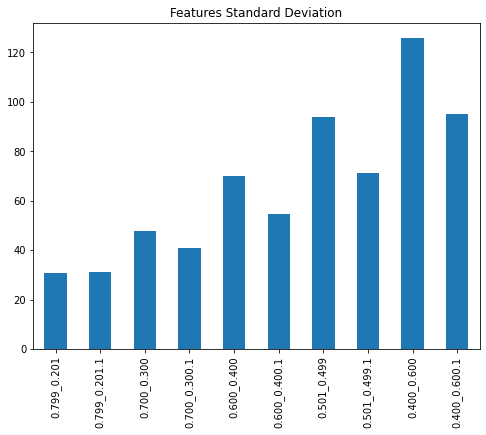

In [ ]:
df2[feature].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")


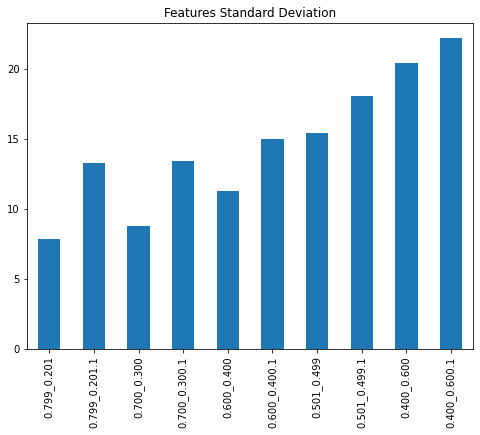

In [ ]:
df3[feature].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")


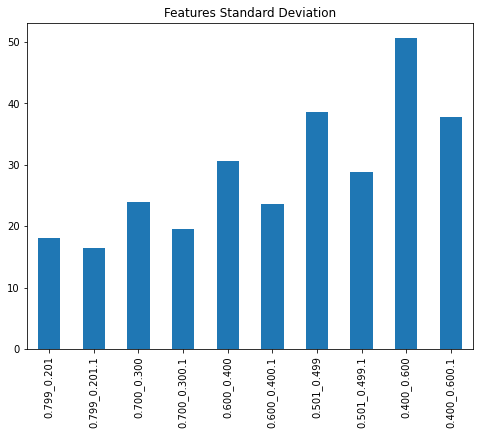

In [ ]:
df4[feature].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")


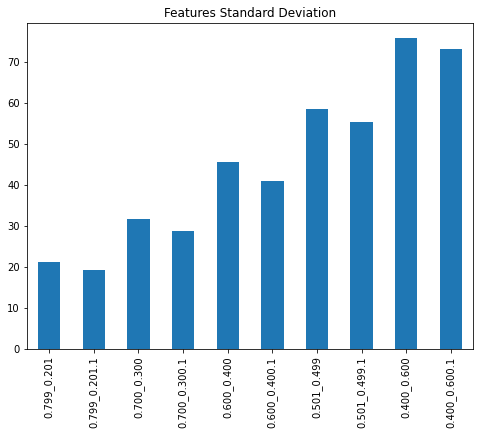

In [ ]:
df5[feature].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")


In [ ]:
df1['Class'].value_counts()


0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int64

In [ ]:
df2['Class'].value_counts()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int64

In [ ]:
df3['Class'].value_counts()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int64

In [ ]:
df4['Class'].value_counts()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int64

In [ ]:
df5['Class'].value_counts()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int64

In [ ]:

df1.info()
df2.info()
df3.info()
df4.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0.799_0.201    25 non-null     float64
 1   0.799_0.201.1  25 non-null     float64
 2   0.700_0.300    25 non-null     float64
 3   0.700_0.300.1  25 non-null     float64
 4   0.600_0.400    25 non-null     float64
 5   0.600_0.400.1  25 non-null     float64
 6   0.501_0.499    25 non-null     float64
 7   0.501_0.499.1  25 non-null     float64
 8   0.400_0.600    25 non-null     float64
 9   0.400_0.600.1  25 non-null     float64
 10  Class          25 non-null     int64  
dtypes: float64(10), int64(1)
memory usage: 2.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0.799_0.201    25 non-null     float64
 1   0.799_0.201.1  25 non-null     flo

In [ ]:
# Building a correlation matrix
df1.corr()


,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0.799_0.201,1.000000,0.946183,0.989992,0.972237,0.968436,0.952311,0.923052,0.891841,0.896531,0.849819,-0.512925
0.799_0.201.1,0.946183,1.000000,0.918407,0.986270,0.892573,0.946351,0.875659,0.901067,0.867921,0.875584,-0.741188
0.700_0.300,0.989992,0.918407,1.000000,0.957252,0.988560,0.946960,0.949666,0.893050,0.920535,0.850476,-0.478511
0.700_0.300.1,0.972237,0.986270,0.957252,1.000000,0.947225,0.983813,0.936683,0.948682,0.928788,0.923346,-0.691247
0.600_0.400,0.968436,0.892573,0.988560,0.947225,1.000000,0.962508,0.981958,0.928265,0.960931,0.893750,-0.494161
0.600_0.400.1,0.952311,0.946351,0.946960,0.983813,0.962508,1.000000,0.971171,0.985453,0.970808,0.967479,-0.674823
0.501_0.499,0.923052,0.875659,0.949666,0.936683,0.981958,0.971171,1.000000,0.968169,0.994808,0.948959,-0.587102
0.501_0.499.1,0.891841,0.901067,0.893050,0.948682,0.928265,0.985453,0.968169,1.000000,0.981366,0.995555,-0.722173
0.400_0.600,0.896531,0.867921,0.920535,0.928788,0.960931,0.970808,0.994808,0.981366,1.000000,0.971466,-0.636180
0.400_0.600.1,0.849819,0.875584,0.850476,0.923346,0.893750,0.967479,0.948959,0.995555,0.971466,1.000000,-0.754854


In [ ]:
# Building a correlation matrix
df2.corr()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0.799_0.201,1.000000,0.966664,0.953629,0.958697,0.898972,0.917148,0.854789,0.869586,0.807924,0.812050,-0.455116
0.799_0.201.1,0.966664,1.000000,0.917344,0.967193,0.884782,0.924201,0.846036,0.870905,0.792211,0.799593,-0.249339
0.700_0.300,0.953629,0.917344,1.000000,0.981819,0.983995,0.978811,0.951618,0.946278,0.905435,0.893857,-0.585345
0.700_0.300.1,0.958697,0.967193,0.981819,1.000000,0.970817,0.986314,0.939121,0.946139,0.887141,0.882020,-0.425572
0.600_0.400,0.898972,0.884782,0.983995,0.970817,1.000000,0.992729,0.984785,0.975659,0.946272,0.931122,-0.558298
0.600_0.400.1,0.917148,0.924201,0.978811,0.986314,0.992729,1.000000,0.980188,0.981672,0.942522,0.934499,-0.466300
0.501_0.499,0.854789,0.846036,0.951618,0.939121,0.984785,0.980188,1.000000,0.995476,0.987003,0.977486,-0.538794
0.501_0.499.1,0.869586,0.870905,0.946278,0.946139,0.975659,0.981672,0.995476,1.000000,0.987043,0.984485,-0.480273
0.400_0.600,0.807924,0.792211,0.905435,0.887141,0.946272,0.942522,0.987003,0.987043,1.000000,0.997017,-0.533687
0.400_0.600.1,0.812050,0.799593,0.893857,0.882020,0.931122,0.934499,0.977486,0.984485,0.997017,1.000000,-0.496791


In [ ]:
# Building a correlation matrix
df3.corr()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0.799_0.201,1.000000,0.991047,0.968805,0.980380,0.864958,0.891974,0.770166,0.783829,0.693452,0.683394,-0.394427
0.799_0.201.1,0.991047,1.000000,0.950820,0.979805,0.860808,0.899185,0.768738,0.791342,0.695915,0.693442,-0.336037
0.700_0.300,0.968805,0.950820,1.000000,0.989657,0.950179,0.955615,0.886147,0.888226,0.827750,0.812583,-0.515654
0.700_0.300.1,0.980380,0.979805,0.989657,1.000000,0.939023,0.959524,0.870478,0.883048,0.810817,0.803330,-0.443177
0.600_0.400,0.864958,0.860808,0.950179,0.939023,1.000000,0.993286,0.982230,0.982945,0.955512,0.948009,-0.526158
0.600_0.400.1,0.891974,0.899185,0.955615,0.959524,0.993286,1.000000,0.966456,0.976370,0.934978,0.933284,-0.475431
0.501_0.499,0.770166,0.768738,0.886147,0.870478,0.982230,0.966456,1.000000,0.995699,0.992422,0.986975,-0.582631
0.501_0.499.1,0.783829,0.791342,0.888226,0.883048,0.982945,0.976370,0.995699,1.000000,0.987610,0.988416,-0.537423
0.400_0.600,0.693452,0.695915,0.827750,0.810817,0.955512,0.934978,0.992422,0.987610,1.000000,0.996839,-0.592289
0.400_0.600.1,0.683394,0.693442,0.812583,0.803330,0.948009,0.933284,0.986975,0.988416,0.996839,1.000000,-0.552011


Text(0, 0.5, '0.400_0.600.1')

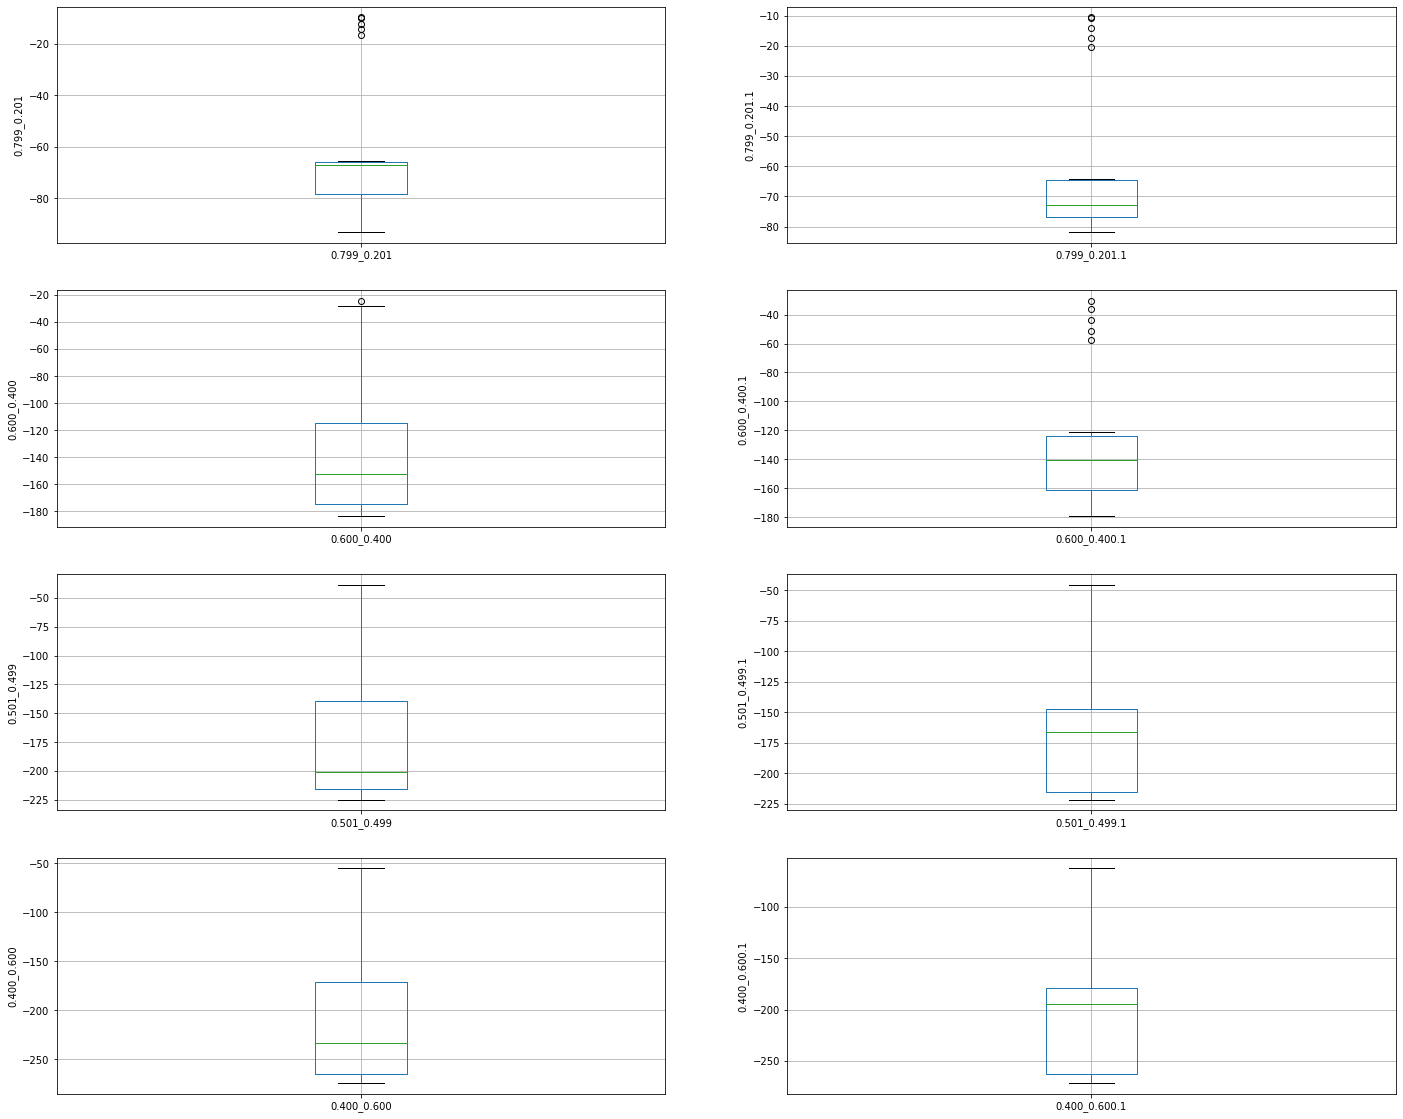

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df1.boxplot(column='0.799_0.201')
fig.set_title('')
fig.set_ylabel('0.799_0.201')


plt.subplot(4, 2, 2)
fig = df1.boxplot(column='0.799_0.201.1')
fig.set_title('')
fig.set_ylabel('0.799_0.201.1')


plt.subplot(4, 2, 3)
fig = df1.boxplot(column='0.600_0.400')
fig.set_title('')
fig.set_ylabel('0.600_0.400')


plt.subplot(4, 2, 4)
fig = df1.boxplot(column='0.600_0.400.1')
fig.set_title('')
fig.set_ylabel('0.600_0.400.1')


plt.subplot(4, 2, 5)
fig = df1.boxplot(column='0.501_0.499')
fig.set_title('')
fig.set_ylabel('0.501_0.499')


plt.subplot(4, 2, 6)
fig = df1.boxplot(column='0.501_0.499.1')
fig.set_title('')
fig.set_ylabel('0.501_0.499.1')


plt.subplot(4, 2, 7)
fig = df1.boxplot(column='0.400_0.600')
fig.set_title('')
fig.set_ylabel('0.400_0.600')


plt.subplot(4, 2, 8)
fig = df1.boxplot(column='0.400_0.600.1')
fig.set_title('')
fig.set_ylabel('0.400_0.600.1')

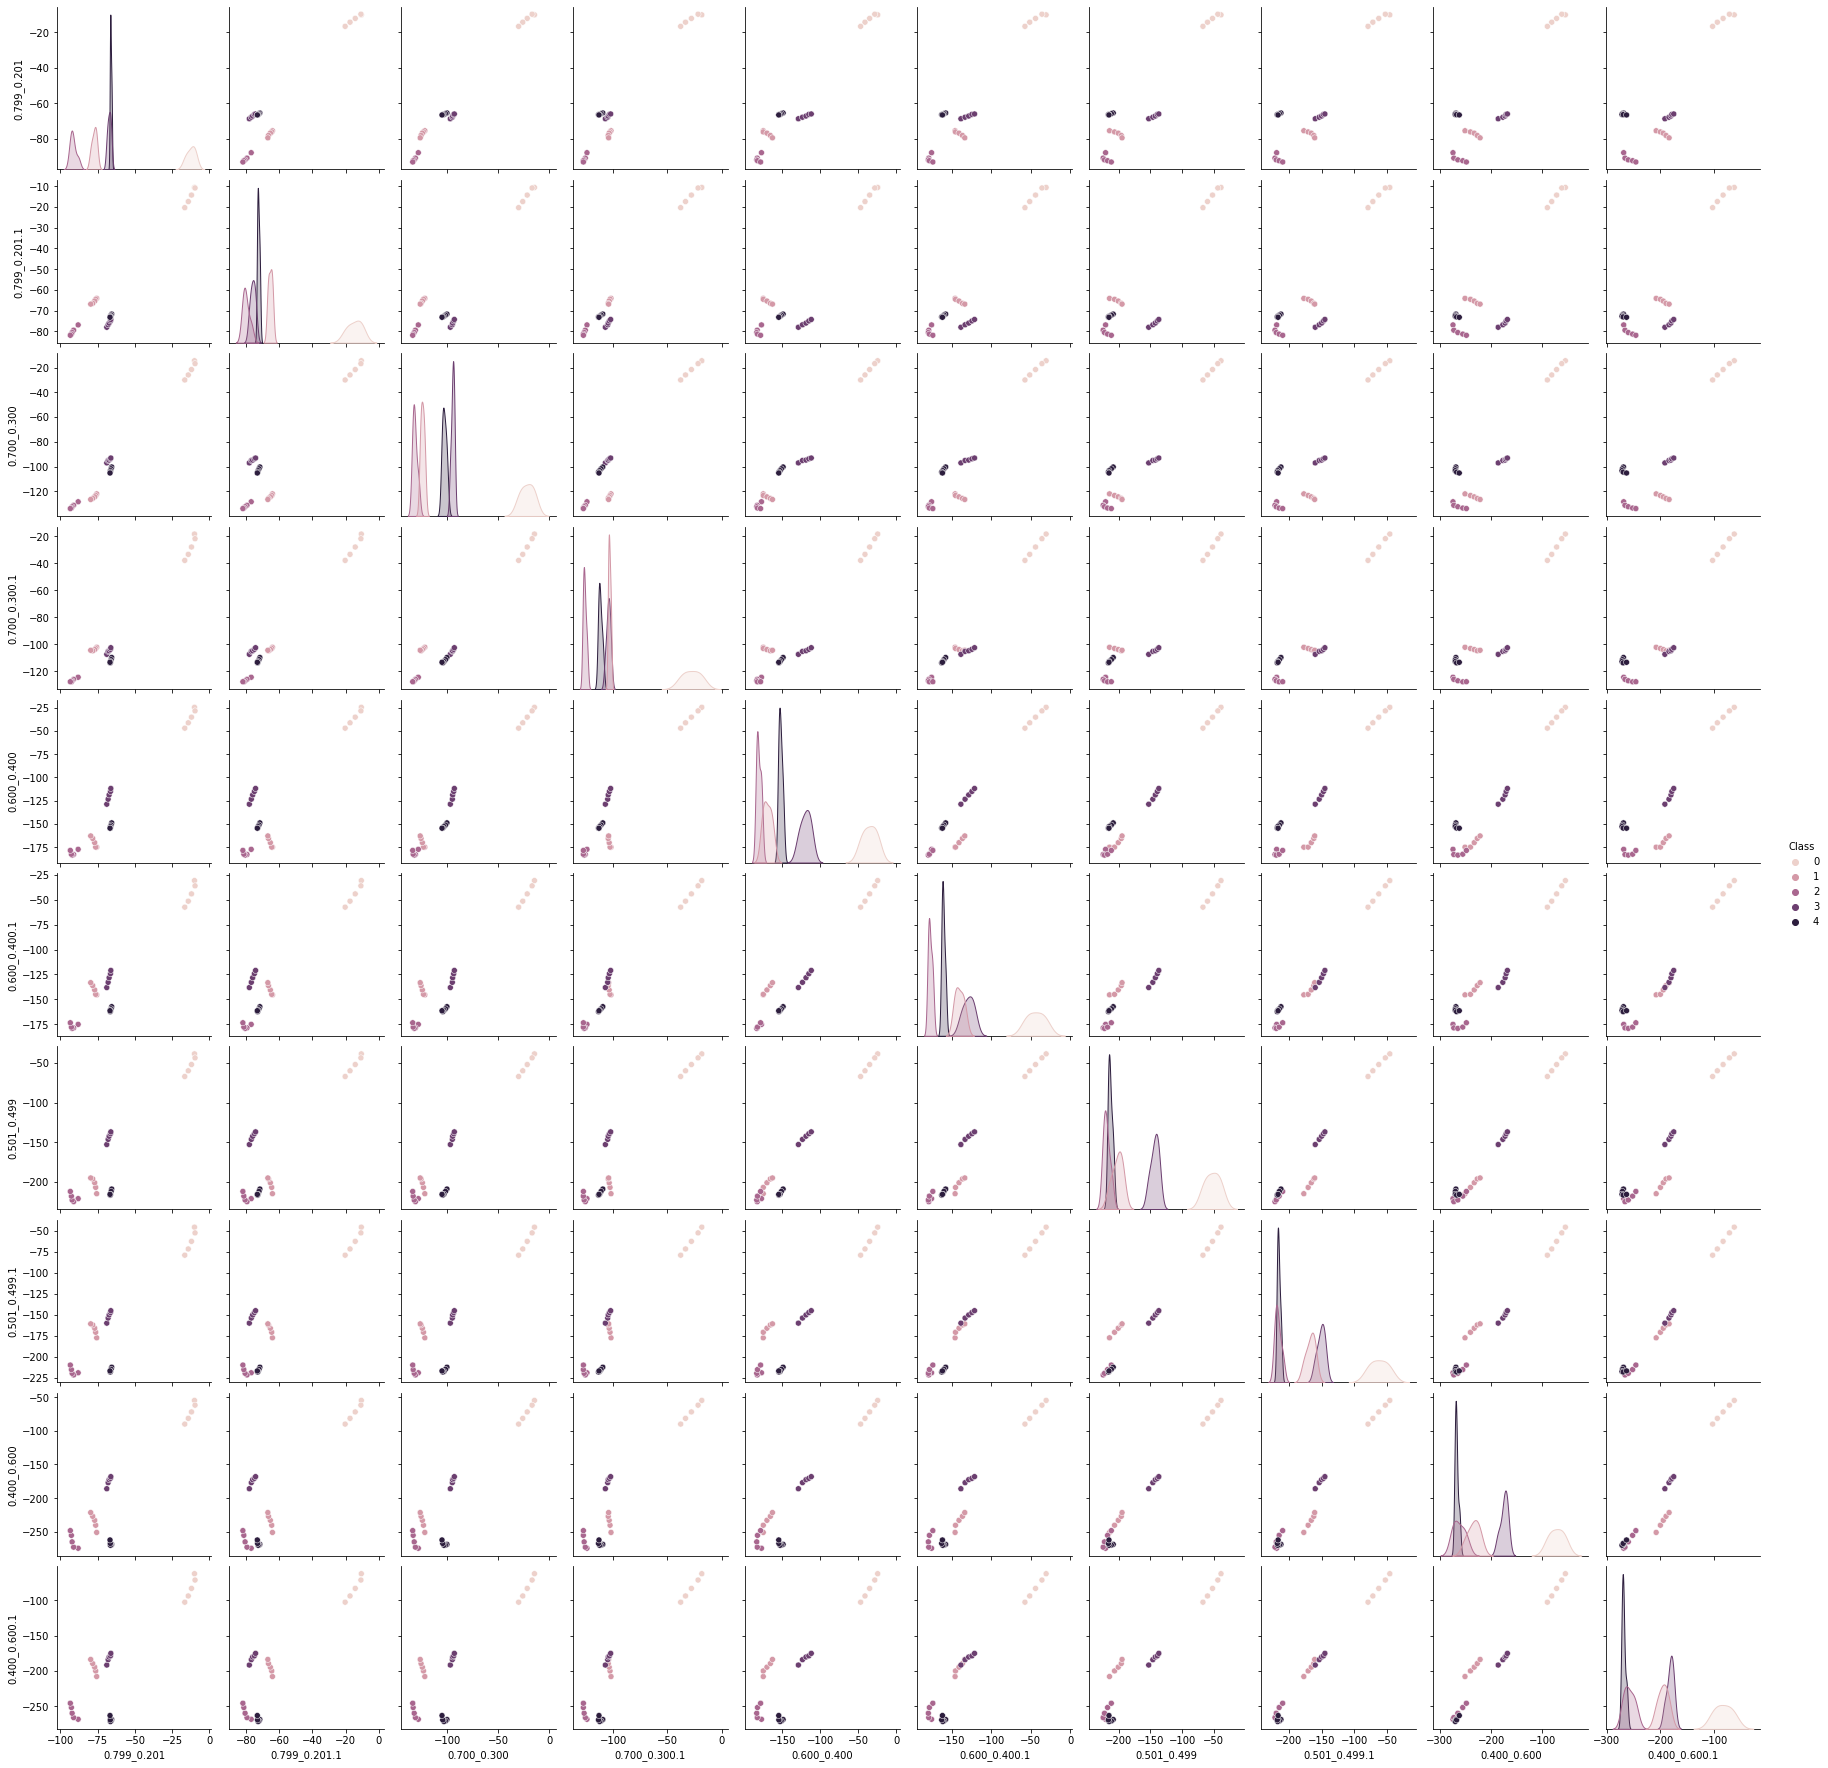

In [ ]:
sns.pairplot(data=df1, hue='Class')
plt.show()

In [ ]:
# Building a correlation matrix
df4.corr()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0.799_0.201,1.000000,0.903915,0.991073,0.922705,0.947201,0.889123,0.868607,0.825459,0.813024,0.778628,-0.527714
0.799_0.201.1,0.903915,1.000000,0.941444,0.995891,0.955024,0.969611,0.899094,0.884742,0.841142,0.810477,-0.487518
0.700_0.300,0.991073,0.941444,1.000000,0.960484,0.970052,0.927918,0.892853,0.854767,0.834196,0.798495,-0.507240
0.700_0.300.1,0.922705,0.995891,0.960484,1.000000,0.969736,0.975093,0.910987,0.892535,0.852454,0.820578,-0.485031
0.600_0.400,0.947201,0.955024,0.970052,0.969736,1.000000,0.984814,0.970530,0.949044,0.933314,0.907696,-0.509750
0.600_0.400.1,0.889123,0.969611,0.927918,0.975093,0.984814,1.000000,0.974129,0.967022,0.940258,0.920115,-0.515920
0.501_0.499,0.868607,0.899094,0.892853,0.910987,0.970530,0.974129,1.000000,0.995632,0.991122,0.981418,-0.553358
0.501_0.499.1,0.825459,0.884742,0.854767,0.892535,0.949044,0.967022,0.995632,1.000000,0.992624,0.988579,-0.569168
0.400_0.600,0.813024,0.841142,0.834196,0.852454,0.933314,0.940258,0.991122,0.992624,1.000000,0.996962,-0.542933
0.400_0.600.1,0.778628,0.810477,0.798495,0.820578,0.907696,0.920115,0.981418,0.988579,0.996962,1.000000,-0.568423


In [ ]:
# Building a correlation matrix
df5.corr()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0.799_0.201,1.000000,0.958574,0.981817,0.949398,0.967429,0.907296,0.933158,0.853497,0.896598,0.806258,-0.604765
0.799_0.201.1,0.958574,1.000000,0.983360,0.993751,0.988684,0.970856,0.989486,0.934726,0.976885,0.903498,-0.612007
0.700_0.300,0.981817,0.983360,1.000000,0.967693,0.995388,0.925521,0.973495,0.871185,0.940369,0.825273,-0.567150
0.700_0.300.1,0.949398,0.993751,0.967693,1.000000,0.976136,0.988805,0.981111,0.961713,0.976592,0.935519,-0.632845
0.600_0.400,0.967429,0.988684,0.995388,0.976136,1.000000,0.942125,0.988183,0.895596,0.962672,0.853636,-0.534899
0.600_0.400.1,0.907296,0.970856,0.925521,0.988805,0.942125,1.000000,0.962911,0.990373,0.976898,0.974769,-0.610255
0.501_0.499,0.933158,0.989486,0.973495,0.981111,0.988183,0.962911,1.000000,0.932853,0.991230,0.902145,-0.506859
0.501_0.499.1,0.853497,0.934726,0.871185,0.961713,0.895596,0.990373,0.932853,1.000000,0.963148,0.995615,-0.570741
0.400_0.600,0.896598,0.976885,0.940369,0.976592,0.962672,0.976898,0.991230,0.963148,1.000000,0.943352,-0.495673
0.400_0.600.1,0.806258,0.903498,0.825273,0.935519,0.853636,0.974769,0.902145,0.995615,0.943352,1.000000,-0.567741


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.neural_network import MLPClassifier



In [ ]:
# Split data into x and y
x= df1.drop("Class", axis=1)
y= df1["Class"]

In [ ]:
y

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    2
11    2
12    2
13    2
14    2
15    3
16    3
17    3
18    3
19    3
20    4
21    4
22    4
23    4
24    4
Name: Class, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X = Scaler_X.fit_transform(x)


In [ ]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=44)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(128,64,32),
					activation='relu',
     				beta_1=0.6,
     				beta_2=0.9,
                    alpha = 0.001,
                    early_stopping = True,
                    shuffle = True,
                    warm_start = True,
                    validation_fraction = 0.3,
     				learning_rate_init=0.01,
     				max_iter = 14000,
     				random_state = 1235,
     				learning_rate='adaptive')

In [ ]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
acc_clf=accuracy_score(y_test,y_pred)
y_train_pred = clf.predict(x_train)
print('Accuracy Linear_pipeline: ',acc_clf)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse_clf=mean_squared_error(y_test, y_pred)
print("Mean Squared Error",mse_clf)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test,y_pred))

Accuracy Linear_pipeline:  1.0
Training accuracy: 100.00%
Testing accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Mean Squared Error 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[3 0 0]
 [0 1 0]
 [0 0 1]]


In [ ]:
y

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    2
11    2
12    2
13    2
14    2
15    3
16    3
17    3
18    3
19    3
20    4
21    4
22    4
23    4
24    4
Name: Class, dtype: int64

In [ ]:
# import SVC classifier
from sklearn.svm import SVC

Accuracy Linear_pipeline:  1.0
Training accuracy: 100.00%
Testing accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Mean Squared Error 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[3 0 0]
 [0 1 0]
 [0 0 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


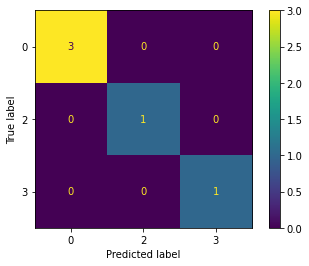

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
acc_svc=accuracy_score(y_test,y_pred)
y_train_pred = svc.predict(x_train)
print('Accuracy Linear_pipeline: ',acc_svc)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse_svc=mean_squared_error(y_test, y_pred)
print("Mean Squared Error",mse_svc)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc,x_test,y_test)
print(confusion_matrix(y_test,y_pred))

In [ ]:
pred_clf=clf.predict_proba(x_test)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
#roc auc score
roc_auc_score(y_test, pred_clf, multi_class='ovo', average='weighted')

ValueError: ignored

In [ ]:
!pip install hmmlearn

     |████████████████████████████████| 129 kB 17.2 MB/s 


In [ ]:
from hmmlearn import hmm

In [ ]:
# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 5, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

In [ ]:
print("Unique states:")
print(states)


Unique states:
[1 0 2 3 4]


In [ ]:
print("\nStart probabilities:")
print(model.startprob_)


Start probabilities:
[0. 1. 0. 0. 0.]


In [ ]:
print("\nTransition matrix:")
print(model.transmat_)


Transition matrix:
[[8.00000000e-001 0.00000000e+000 2.00000000e-001 0.00000000e+000
  0.00000000e+000]
 [2.00000000e-001 8.00000000e-001 0.00000000e+000 0.00000000e+000
  0.00000000e+000]
 [1.26728179e-297 0.00000000e+000 8.00000000e-001 2.00000000e-001
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 8.00000000e-001
  2.00000000e-001]
 [2.43536656e-201 0.00000000e+000 8.04769034e-199 0.00000000e+000
  1.00000000e+000]]


In [ ]:
print("\nGaussian distribution means:")
print(model.means_)


Gaussian distribution means:
[[-0.53589677 -0.1544208  -0.74570243 -0.24968878 -0.72357176 -0.21628506
  -0.57259602 -0.08086099 -0.43554818  0.03292876]
 [ 1.87897614  1.95306853  1.87047842  1.93369132  1.82779306  1.85322731
   1.79679289  1.76250441  1.76979655  1.70578234]
 [-1.05960595 -0.75805516 -0.93624232 -0.90890173 -0.93703787 -1.00819863
  -0.83892854 -0.9514531  -0.82409378 -0.90688697]
 [-0.16207421 -0.59191041  0.01126334 -0.28004311  0.22786195  0.0240651
   0.35991444  0.20200515  0.3741188   0.22948512]
 [-0.12139921 -0.44868217 -0.19979701 -0.49505769 -0.39504538 -0.65280872
  -0.74518277 -0.93219547 -0.88427338 -1.06130925]]


In [ ]:
print("\nGaussian distribution covariances:")
print(model.covars_)


Gaussian distribution covariances:
[[[0.00487505 0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.00397009 0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.0037052  0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.00272559 0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.0105378  0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.01265704
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.01532047 0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.01340995 0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.       

In [ ]:
num_comp=5
model1=hmm.GaussianHMM(n_components=num_comp,covariance_type="diag",n_iter=1000,random_state=42)
model1.fit(X)
hiddenstates=model1.predict(X)

In [ ]:
acc_hmm=accuracy_score(y,hiddenstates)
print("Accuracy_Score",acc_hmm)

Accuracy_Score 0.6


In [ ]:
import sklearn.metrics as sk
cm1=sk.confusion_matrix(y,hiddenstates)
cm1

array([[0, 5, 0, 0, 0],
       [5, 0, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 5, 0],
       [0, 0, 0, 0, 5]])

In [ ]:
FP = cm1.sum(axis=0) - np.diag(cm1)
FN = cm1.sum(axis=1) - np.diag(cm1)
TP = np.diag(cm1)
TN = cm1.sum() - (FP + FN + TP)
Sensitivity = TP / (TP + FN)
Specificity = TN / (TN + FP)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 = 2 * (Precision * Recall) / (Precision + Recall)
Total_Accuracy = (TP + TN) / (TP + FP + FN + TN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [ ]:
Sensitivity

array([0., 0., 1., 1., 1.])

In [ ]:
Specificity

array([0.75, 0.75, 1.  , 1.  , 1.  ])

In [ ]:
Precision

array([0., 0., 1., 1., 1.])

In [ ]:
F1

array([nan, nan,  1.,  1.,  1.])

In [ ]:
Total_Accuracy

array([0.6, 0.6, 1. , 1. , 1. ])

In [ ]:
for i in range(model1.n_components):
    print('\nHidden_State', i+1)
    print("Mean=",round(model.means_[i][0],3))
    print("Variance=",round(np.diag(model.covars_[i])[0],3))


Hidden_State 1
Mean= -0.536
Variance= 0.005

Hidden_State 2
Mean= 1.879
Variance= 0.011

Hidden_State 3
Mean= -1.06
Variance= 0.007

Hidden_State 4
Mean= -0.162
Variance= 0.003

Hidden_State 5
Mean= -0.121
Variance= 0.002


In [ ]:
pred_prob = model.predict_proba(X)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y, pred_prob[:,1], pos_label=1)
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y))]
p_fpr, p_tpr, _ = roc_curve(y, random_probs, pos_label=1)
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y, pred_prob, multi_class="ovo",average='macro')
auc_score

0.73

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
kf = KFold(n_splits=5, shuffle=True)
from sklearn.metrics import accuracy_score
train_scores = []
test_scores = []
fold_index = 1
for train, test in kf.split(X, y):
    clf = hmm.GaussianHMM(n_components = 6, covariance_type = "diag", n_iter = 1000, random_state = 1142)
    clf.fit(X[train])
    y_states = clf.predict(X[test])
    print(accuracy_score(y[test],y_states))

0.0
0.6
0.2
0.2
0.2


In [ ]:
from sklearn.cluster import KMeans

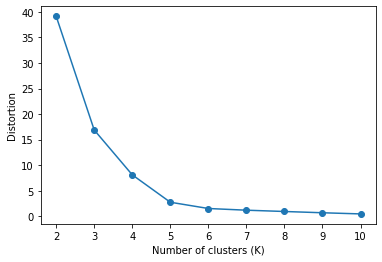

In [ ]:
distortions = []

for k in range(2, 11):
    KMeans_model = KMeans(n_clusters=k, random_state=42)
    KMeans_model.fit(X)
    distortions.append(KMeans_model.inertia_)

plt.plot(range(2, 11), distortions,  marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.savefig('elbow plot.png')

In [ ]:
!pip install yellowbrick

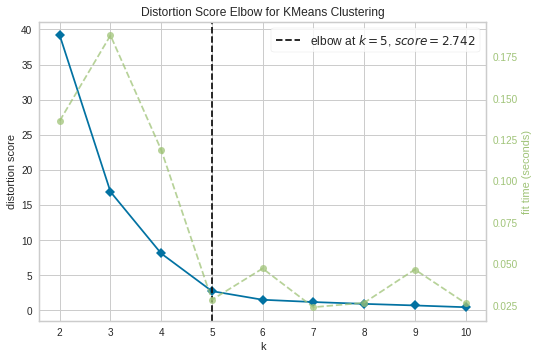

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizer3 = KElbowVisualizer(KMeans(), k=(2,11))

visualizer3.fit(X) # Fit the data to the visualizer
visualizer3.show(outpath='elbowplot2.png')

In [ ]:

from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    model2 = KMeans(n_clusters=k, random_state=42)
    model2.fit(X)
    score = silhouette_score(X, model2.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

Silhouette Score for k =  2 is 0.7783910067881848
Silhouette Score for k =  3 is 0.5939177147102458
Silhouette Score for k =  4 is 0.6789754653369913
Silhouette Score for k =  5 is 0.8076871998423809
Silhouette Score for k =  6 is 0.7364922009323468
Silhouette Score for k =  7 is 0.6823376430900577
Silhouette Score for k =  8 is 0.6217120685955098
Silhouette Score for k =  9 is 0.5843280477261555
Silhouette Score for k =  10 is 0.5231281214894868


In [ ]:
model = KMeans(n_clusters=5, random_state=34)
model.fit(X)
centroids = model.cluster_centers_

print("Centroids",centroids)
print("Model_Interia",model.inertia_)
print("Model_Labels",model.labels_)
clusters = model.fit_predict(X)

strlabels = ['']*len(y)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = '0'
    elif clusters[i]==1: strlabels[i] = '1'
    elif clusters[i]==1: strlabels[i] = '2'
    elif clusters[i]==1: strlabels[i] = '3'
    elif clusters[i]==1: strlabels[i] = '4'

from sklearn.metrics import accuracy_score
print("Accuracy Score",accuracy_score(y, clusters)*100.0)

Centroids [[ 1.87897614  1.95306853  1.87047842  1.93369132  1.82779306  1.85322731
   1.79679289  1.76250441  1.76979655  1.70578234]
 [-0.53589677 -0.1544208  -0.74570243 -0.24968878 -0.72357176 -0.21628506
  -0.57259602 -0.08086099 -0.43554818  0.03292876]
 [-1.05960595 -0.75805516 -0.93624232 -0.90890173 -0.93703787 -1.00819863
  -0.83892854 -0.9514531  -0.82409378 -0.90688697]
 [-0.16207421 -0.59191041  0.01126334 -0.28004311  0.22786195  0.0240651
   0.35991444  0.20200515  0.3741188   0.22948512]
 [-0.12139921 -0.44868217 -0.19979701 -0.49505769 -0.39504538 -0.65280872
  -0.74518277 -0.93219547 -0.88427338 -1.06130925]]
Model_Interia 2.741864995718026
Model_Labels [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]
Accuracy Score 100.0


In [ ]:
labels = model.labels_

In [ ]:
correct_labels = sum(y == labels)

In [ ]:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 25 out of 25 samples were correctly labeled.
Accuracy score: 1.00


In [ ]:

cm=confusion_matrix(y,clusters)
print(cm)

[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


In [ ]:
print(classification_report(y,clusters))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [ ]:
#importing the K fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 5
model = KMeans(n_clusters=5)
kfold = KFold(n_splits=num_folds)
results_lda = cross_val_score(model,X, y, cv=kfold)
accuracy_lda=np.mean(abs(results_lda))
print('Average accuracy: ',accuracy_lda)
print('Standard Deviation: ',results_lda.std())

Average accuracy:  44.55481333319088
Standard Deviation:  62.39555311530515


In [ ]:
pip install fuzzy-c-means

     |████████████████████████████████| 10.9 MB 27.2 MB/s 


In [ ]:
from fcmeans import FCM
fcmean=FCM(n_clusters=5,random_state=66)
fcmean.fit(X)
cnt=fcmean.centers
print("Centres",cnt)
pred1=fcmean.predict(X)
print(pred1)
print("Accuracy Score",accuracy_score(y,pred1)*100.0)


Centres [[ 1.88122053  1.95631292  1.87305915  1.9370368   1.83046375  1.85653629
   1.7995995   1.76581764  1.772637    1.70906903]
 [-0.53691122 -0.15689363 -0.74685987 -0.2519609  -0.72012166 -0.21361379
  -0.56354834 -0.07362579 -0.42631484  0.03921116]
 [-1.06029837 -0.75871255 -0.93678277 -0.90891931 -0.94019476 -1.01076421
  -0.84179991 -0.953534   -0.82540625 -0.90736614]
 [-0.16006381 -0.5883548   0.01306969 -0.27701931  0.23354736  0.03109023
   0.36481763  0.20759244  0.3795789   0.23491826]
 [-0.12308527 -0.44857674 -0.2014624  -0.49529089 -0.39626536 -0.65273523
  -0.74521561 -0.93109347 -0.88370276 -1.05975848]]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]
Accuracy Score 100.0


In [ ]:
cm=confusion_matrix(y,pred1)
print(cm)
print(classification_report(y,pred1))

[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [ ]:
center = fcmean.centers
center

array([[ 1.88122053,  1.95631292,  1.87305915,  1.9370368 ,  1.83046375,
         1.85653629,  1.7995995 ,  1.76581764,  1.772637  ,  1.70906903],
       [-0.53691122, -0.15689363, -0.74685987, -0.2519609 , -0.72012166,
        -0.21361379, -0.56354834, -0.07362579, -0.42631484,  0.03921116],
       [-1.06029837, -0.75871255, -0.93678277, -0.90891931, -0.94019476,
        -1.01076421, -0.84179991, -0.953534  , -0.82540625, -0.90736614],
       [-0.16006381, -0.5883548 ,  0.01306969, -0.27701931,  0.23354736,
         0.03109023,  0.36481763,  0.20759244,  0.3795789 ,  0.23491826],
       [-0.12308527, -0.44857674, -0.2014624 , -0.49529089, -0.39626536,
        -0.65273523, -0.74521561, -0.93109347, -0.88370276, -1.05975848]])

In [ ]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 10, c = 'r')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 10, c = 'b' )
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 10, c = 'b' )
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], s = 10, c = 'b' )
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], s = 10, c = 'b' )
#plt.scatter(data[pred == 2, 0], data[pred == 2, 1], s = 10, c = 'g' )
plt.scatter(center[:, 0], center[:, 1], s = 300, c = 'black',marker = '+')
plt.title('Clusters of customers')
plt.xlabel('X_label ')
plt.ylabel('y_label ')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
df1_1=df1.copy()
df2_1=df2.copy()
df3_1=df3.copy()
df4_1=df4.copy()
df5_1=df5.copy()

In [ ]:
df1_1.columns=["1","2","3","4","5","6","7","8","9","10","Class1"]
df2_1.columns=["11","12","13","14","15","16","17","18","19","20","Class2"]
df3_1.columns=["21","22","23","24","25","26","27","28","29","30","Class3"]
df4_1.columns=["31","32","33","34","35","36","37","38","39","40","Class4"]
df5_1.columns=["41","42","43","44","45","46","47","48","49","50","Class"]

In [ ]:
dataset = pd.concat([df1_1, df2_1, df3_1, df4_1, df5_1],axis=1)
print("Shape of dataset: ", dataset.shape)

Shape of dataset:  (25, 55)


In [ ]:
dataset

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,Class
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,...,-7.95,-21.44,-17.46,-34.39,-27.35,-48.61,-39.91,-63.62,-53.14,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,...,-12.01,-26.46,-22.75,-41.48,-34.60,-56.74,-48.68,-73.45,-63.17,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,...,-16.29,-32.84,-28.72,-49.32,-42.29,-65.87,-57.89,-84.45,-73.99,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,...,-19.81,-38.18,-33.77,-56.27,-48.93,-74.09,-65.99,-92.61,-83.37,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,...,-22.36,-42.61,-37.94,-60.47,-53.86,-80.67,-72.62,-101.14,-91.33,0
5,-75.61,-64.10,-122.08,-102.17,-174.79,-145.50,-214.69,-177.30,-250.83,-207.99,...,-56.17,-94.77,-87.56,-144.20,-125.19,-203.85,-167.42,-263.80,-218.03,1
6,-76.28,-64.53,-123.40,-103.06,-174.74,-144.98,-206.75,-170.68,-240.14,-200.05,...,-59.26,-98.57,-89.20,-149.15,-126.75,-206.98,-169.59,-269.29,-220.77,1
7,-76.96,-65.37,-124.50,-103.87,-169.93,-140.56,-200.89,-165.88,-232.82,-194.70,...,-60.88,-100.87,-90.63,-153.09,-127.88,-210.05,-170.99,-274.14,-222.00,1
8,-78.29,-66.49,-125.78,-104.77,-165.42,-136.17,-196.10,-161.99,-226.89,-189.57,...,-61.76,-106.92,-91.52,-157.94,-128.49,-210.78,-171.39,-274.14,-221.00,1
9,-79.62,-66.85,-126.61,-104.38,-162.73,-133.26,-194.87,-160.68,-221.33,-183.81,...,-62.89,-108.56,-93.26,-157.61,-129.42,-214.45,-171.58,-277.29,-219.58,1


In [ ]:
dataset.drop(["Class1","Class2","Class3","Class4"], axis = 1, inplace = True)



In [ ]:
dataset

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,Class
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,...,-7.95,-21.44,-17.46,-34.39,-27.35,-48.61,-39.91,-63.62,-53.14,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,...,-12.01,-26.46,-22.75,-41.48,-34.60,-56.74,-48.68,-73.45,-63.17,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,...,-16.29,-32.84,-28.72,-49.32,-42.29,-65.87,-57.89,-84.45,-73.99,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,...,-19.81,-38.18,-33.77,-56.27,-48.93,-74.09,-65.99,-92.61,-83.37,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,...,-22.36,-42.61,-37.94,-60.47,-53.86,-80.67,-72.62,-101.14,-91.33,0
5,-75.61,-64.10,-122.08,-102.17,-174.79,-145.50,-214.69,-177.30,-250.83,-207.99,...,-56.17,-94.77,-87.56,-144.20,-125.19,-203.85,-167.42,-263.80,-218.03,1
6,-76.28,-64.53,-123.40,-103.06,-174.74,-144.98,-206.75,-170.68,-240.14,-200.05,...,-59.26,-98.57,-89.20,-149.15,-126.75,-206.98,-169.59,-269.29,-220.77,1
7,-76.96,-65.37,-124.50,-103.87,-169.93,-140.56,-200.89,-165.88,-232.82,-194.70,...,-60.88,-100.87,-90.63,-153.09,-127.88,-210.05,-170.99,-274.14,-222.00,1
8,-78.29,-66.49,-125.78,-104.77,-165.42,-136.17,-196.10,-161.99,-226.89,-189.57,...,-61.76,-106.92,-91.52,-157.94,-128.49,-210.78,-171.39,-274.14,-221.00,1
9,-79.62,-66.85,-126.61,-104.38,-162.73,-133.26,-194.87,-160.68,-221.33,-183.81,...,-62.89,-108.56,-93.26,-157.61,-129.42,-214.45,-171.58,-277.29,-219.58,1


In [ ]:
!pip install pymrmre

     |████████████████████████████████| 18.5 MB 8.0 MB/s 
  Created wheel for pymrmre: filename=pymrmre-1.0.7-cp37-cp37m-linux_x86_64.whl size=325973 sha256=02992503e678fa829e02b9685b88d27bd417524100b1fe25c4383eb2d9ff47da
  Stored in directory: /root/.cache/pip/wheels/3b/38/73/a67d8eaee79b32227d1e97fa50ae45802e470576aa10ec8029
Successfully built pymrmre


In [ ]:
!pip install numpy Cython


In [ ]:
!pip install -U pymrmre

In [ ]:
np.__version__

'1.21.6'

In [ ]:
X1=dataset.drop("Class",axis=1)
y1=dataset["Class"]

In [ ]:
from pymrmre import mrmr

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
import statistics
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
!pip install pymrmr

     |████████████████████████████████| 69 kB 6.2 MB/s 
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp37-cp37m-linux_x86_64.whl size=276640 sha256=8152e9ea4abefa55d13ba893256c1d4b50f1d527d6ca8704051d0ce8020b1aaf
  Stored in directory: /root/.cache/pip/wheels/81/95/66/05731ac334bc74a1251a727af18eb28dc027217ee817a0cab6
Successfully built pymrmr


In [ ]:
import pymrmr

In [ ]:
auc_lr=[]
pre_lr=[]
rec_lr=[]
acc_lr=[]
f1_lr=[]

cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X1, y1):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)

    train, test = X1.iloc[train_index], X1.iloc[test_index]
    Y_train, Y_test= y1.iloc[train_index], y1.iloc[test_index]
    features=pymrmr.mRMR(train, 'MIQ', 50)
    print("Best Features: ", features)

    dataset1=X1[features]

    X_train=dataset1.iloc[train_index]
    X_test=dataset1.iloc[test_index]

    clf = LogisticRegression(random_state=0, penalty='l1', C=1, class_weight=None, solver='liblinear', max_iter=100).fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    from sklearn import metrics

    acc_clf=accuracy_score(Y_test,y_pred)
    y_train_pred = clf.predict(X_train)
    print('Accuracy Linear_pipeline: ',acc_clf)
    print('Training accuracy: %.2f%%' % (accuracy_score(Y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(Y_test, y_pred) * 100))


Best Features:  ['19', '34', '44', '22', '42', '31', '4', '24', '47', '33', '29', '43', '32', '27', '6', '48', '8', '7', '40', '23', '39', '2', '21', '5', '3', '38', '41', '16', '46', '15', '17', '18', '20', '10', '28', '12', '35', '26', '50', '13', '37', '9', '49', '14', '45', '30', '36', '25', '11', '1']
Accuracy Linear_pipeline:  1.0
Training accuracy: 100.00%
Testing accuracy: 100.00%
Best Features:  ['39', '34', '2', '47', '44', '6', '27', '24', '41', '7', '48', '42', '16', '3', '29', '33', '12', '8', '37', '10', '31', '19', '50', '20', '46', '43', '38', '14', '30', '40', '22', '9', '5', '35', '15', '18', '17', '28', '13', '26', '36', '45', '32', '49', '23', '25', '11', '4', '21', '1']
Accuracy Linear_pipeline:  1.0
Training accuracy: 100.00%
Testing accuracy: 100.00%
Best Features:  ['8', '31', '27', '42', '44', '47', '34', '2', '16', '7', '29', '6', '33', '40', '43', '3', '22', '39', '38', '48', '14', '12', '21', '41', '5', '24', '4', '28', '49', '9', '15', '46', '19', '13', '26

In [ ]:
pymrmr.mRMR(X1, 'MIQ',6)

['46', '24', '44', '27', '42', '43']

In [ ]:
pymrmr.mRMR(X1, 'MID',6)

['46', '24', '44', '27', '42', '43']

In [ ]:
!pip install mrmr_selection

     |████████████████████████████████| 80 kB 6.9 MB/s 


In [ ]:
import mrmr

In [ ]:
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=X1, y=y1, K=10)

100%|██████████| 10/10 [00:00<00:00, 20.00it/s]


In [ ]:
print(selected_features)

['32', '31', '1', '22', '3', '2', '12', '50', '49', '4']


In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
def mrmr(X,y,num_select):
    F = pd.Series(f_regression(X1, y1)[0], index = X1.columns)
    corr = X1.corr(method="spearman").abs().clip(.00001)

    sel = []
    ns = list(X1.columns)
    for i in range(num_select):
        if i > 0:
            ls = sel[-1]
            corr.loc[ns, ls] = X1[ns].corrwith(X1[ls]).abs().clip(.00001)

        val = F.loc[ns] / corr.loc[ns, sel].mean(axis = 1).fillna(.00001)
        best_score = val.index[val.argmax()]
        sel.append(best_score)
        ns.remove(best_score)
    return sel



In [ ]:
from mrmr import mrmr_classif
i=[5,10,15]
for N in i:
  selected_features = mrmr_classif(X=X1, y=y1, K=N)
  reduced_features = X1[selected_features]
  reduced_features.to_csv(f"melanoma_MRMR_{N}.csv")
  print(f"melanoma_MRMR_{N}.csv generated!")

100%|██████████| 5/5 [00:00<00:00, 21.63it/s]


melanoma_MRMR_5.csv generated!


100%|██████████| 10/10 [00:00<00:00, 25.93it/s]


melanoma_MRMR_10.csv generated!


100%|██████████| 15/15 [00:00<00:00, 33.82it/s]


melanoma_MRMR_15.csv generated!


In [ ]:
  print(f"melanoma_MRMR_{5}.csv")

melanoma_MRMR_5.csv


In [ ]:
d1=pd.read_csv("melanoma_MRMR_5.csv")


In [ ]:
d1

,Unnamed: 0,32,31,1,22,3
0,0,-10.99,-11.98,-10.06,-14.21,-14.43
1,1,-11.33,-12.15,-9.69,-15.44,-16.73
2,2,-11.74,-12.58,-12.07,-16.72,-21.54
3,3,-12.82,-13.79,-14.21,-17.98,-25.91
4,4,-13.87,-15.73,-16.57,-19.11,-29.97
5,5,-38.66,-58.41,-75.61,-55.46,-122.08
6,6,-40.01,-59.68,-76.28,-54.77,-123.40
7,7,-40.73,-60.12,-76.96,-54.37,-124.50
8,8,-41.20,-60.41,-78.29,-53.94,-125.78
9,9,-39.88,-60.87,-79.62,-53.42,-126.61


In [ ]:
X_new=d1.drop("Unnamed: 0",axis=1)
y1=dataset["Class"]

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_mod = Scaler_X.fit_transform(X_new)


In [ ]:
x_train1,x_test1, y_train, y_test = train_test_split(X_mod,y1,test_size=0.2)

In [ ]:
# import SVC classifier
from sklearn.svm import SVC

Accuracy Linear_pipeline:  0.6
Training accuracy: 85.00%
Testing accuracy: 60.00%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.58      0.75      0.62         5
weighted avg       0.47      0.60      0.50         5

Mean Squared Error 0.4
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.58      0.75      0.62         5
weighted avg       0.47      0.60      0.50         5

[[1 0 0 0]
 [0 1 0 0]
 [0

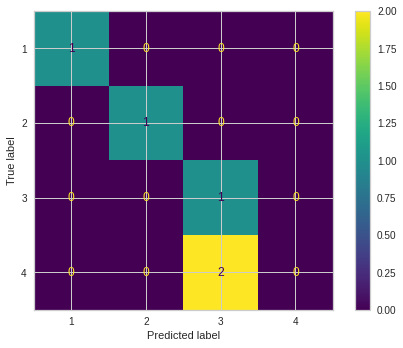

In [ ]:
svc=SVC(random_state=100)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
acc_svc=accuracy_score(y_test,y_pred)
y_train_pred = svc.predict(x_train)
print('Accuracy Linear_pipeline: ',acc_svc)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse_svc=mean_squared_error(y_test, y_pred)
print("Mean Squared Error",mse_svc)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc,x_test,y_test)
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Mean Squared Error 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


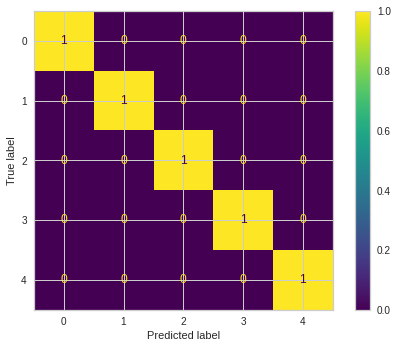

In [ ]:
svc=SVC(random_state=100)
svc.fit(x_train1,y_train1)
y_pred1 = svc.predict(x_test1)

from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred1))
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse_svc=mean_squared_error(y_test1, y_pred1)
print("Mean Squared Error",mse_svc)
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred1))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc,x_test1,y_test1)
print(confusion_matrix(y_test1,y_pred1))

In [ ]:
clf = MLPClassifier()
clf.fit(x_train1,y_train1)
y_pred1 = clf.predict(x_test1)
acc_clf1=accuracy_score(y_test1,y_pred1)
y_train_pred1 = clf.predict(x_train1)
print('Accuracy Linear_pipeline: ',acc_clf1)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train1,y_train_pred1) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test1, y_pred1) * 100))
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred1))
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse_clf=mean_squared_error(y_test1, y_pred1)
print("Mean Squared Error",mse_clf)
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred1))
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test1,y_pred1))

Accuracy Linear_pipeline:  1.0
Training accuracy: 100.00%
Testing accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Mean Squared Error 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00 

In [ ]:
# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 5, random_state = 717)
model.fit(X_mod)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X_mod)
states = pd.unique(Z)
acc_hmm=accuracy_score(y1,Z)
print("Accuracy_Score",acc_hmm)

Accuracy_Score 1.0


In [ ]:
print("Unique states:")
print(states)
print("\nStart probabilities:")
print(model.startprob_)
print("\nTransition matrix:")
print(model.transmat_)
print("\nGaussian distribution means:")
print(model.means_)
print("\nGaussian distribution covariances:")
print(model.covars_)

Unique states:
[0 1 2 3 4]

Start probabilities:
[1. 0. 0. 0. 0.]

Transition matrix:
[[8.00000000e-001 2.00000000e-001 0.00000000e+000 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 8.00000000e-001 2.00000000e-001 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 8.00000000e-001 2.00000000e-001
  5.80746420e-254]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 8.00000000e-001
  2.00000000e-001]
 [0.00000000e+000 1.43517652e-255 0.00000000e+000 4.41485118e-107
  1.00000000e+000]]

Gaussian distribution means:
[[ 1.63119466  1.88172993  1.87897614  1.72138516  1.87047842]
 [-0.10124605 -0.75061102 -0.53589677 -1.1774758  -0.74570243]
 [-1.48913279 -0.83141167 -1.05960595 -0.66536933 -0.93624232]
 [ 0.20450066  0.11923739 -0.16207421  0.35376869  0.01126334]
 [-0.24531648 -0.41894463 -0.12139921 -0.23230872 -0.19979701]]

Gaussian distribution covariances:
[[[0.00629916 0.         0.         0.         0.        ]
  [0.         0.00818528 0.         0.         

In [ ]:
acc_hmm=accuracy_score(y,Z)
print("Accuracy_Score",acc_hmm)

Accuracy_Score 1.0


In [ ]:
import sklearn.metrics as sk
cm1=sk.confusion_matrix(y,Z)
cm1

array([[5, 0, 0, 0, 0],
       [0, 5, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 5, 0],
       [0, 0, 0, 0, 5]])

In [ ]:
pred_prob = model.predict_proba(X_mod)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y1, pred_prob[:,1], pos_label=1)
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y))]
p_fpr, p_tpr, _ = roc_curve(y1, random_probs, pos_label=1)
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y1, pred_prob, multi_class="ovo",average='macro')
auc_score

1.0

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
kf = KFold(n_splits=5, shuffle=True)
from sklearn.metrics import accuracy_score
train_scores = []
test_scores = []
fold_index = 1
for train, test in kf.split(X, y):
    clf = hmm.GaussianHMM(n_components = 5, covariance_type = "diag", n_iter = 50, random_state = 785)
    clf.fit(X[train])
    y_states = clf.predict(X[test])
    print(accuracy_score(y[test],y_states))

0.4
0.4
0.6
0.4
0.8


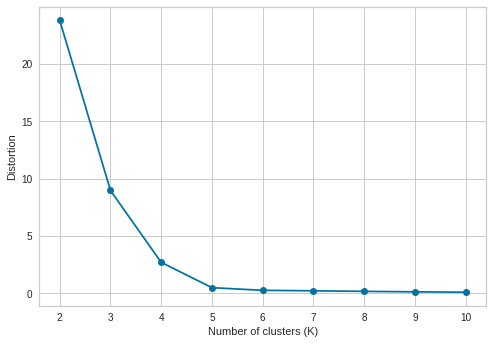

In [ ]:
distortions = []

for k in range(2, 11):
    KMeans_model = KMeans(n_clusters=k, random_state=42)
    KMeans_model.fit(X_mod)
    distortions.append(KMeans_model.inertia_)

plt.plot(range(2, 11), distortions,  marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.savefig('elbow plot.png')

In [ ]:
model = KMeans(n_clusters=5, random_state=25)
model.fit(X_mod)
centroids = model.cluster_centers_

print("Centroids",centroids)
print("Model_Interia",model.inertia_)
print("Model_Labels",model.labels_)
clusters = model.fit_predict(X_mod)

strlabels = ['']*len(y1)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = '0'
    elif clusters[i]==1: strlabels[i] = '1'
    elif clusters[i]==1: strlabels[i] = '2'
    elif clusters[i]==1: strlabels[i] = '3'
    elif clusters[i]==1: strlabels[i] = '4'

from sklearn.metrics import accuracy_score
print("Accuracy Score",accuracy_score(y1, clusters)*100.0)

Centroids [[ 1.63119466  1.88172993  1.87897614  1.72138516  1.87047842]
 [-0.10124605 -0.75061102 -0.53589677 -1.1774758  -0.74570243]
 [-1.48913279 -0.83141167 -1.05960595 -0.66536933 -0.93624232]
 [ 0.20450066  0.11923739 -0.16207421  0.35376869  0.01126334]
 [-0.24531648 -0.41894463 -0.12139921 -0.23230872 -0.19979701]]
Model_Interia 0.49908854113980816
Model_Labels [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]
Accuracy Score 100.0


In [ ]:
labels = model.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 25 out of 25 samples were correctly labeled.
Accuracy score: 1.00


In [ ]:

cm=confusion_matrix(y1,clusters)
print(cm)
print(classification_report(y,clusters))

[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [ ]:
#importing the K fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 5
model = KMeans(n_clusters=5)
kfold = KFold(n_splits=num_folds)
results_lda = cross_val_score(model,X_mod, y1, cv=kfold)
accuracy_lda=np.mean(abs(results_lda))
print('Average accuracy: ',accuracy_lda)
print('Standard Deviation: ',results_lda.std())

Average accuracy:  20.497430259093058
Standard Deviation:  26.652420557607382


In [ ]:
fcmean=FCM(n_clusters=5,random_state=117)
fcmean.fit(X_mod)
cnt=fcmean.centers
print("Centres",cnt)
pred1=fcmean.predict(X_mod)
print(pred1)
print("Accuracy Score",accuracy_score(y1,pred1)*100.0)


Centres [[ 1.63189132  1.88273392  1.8799389   1.72228733  1.87160215]
 [-0.1024317  -0.75113711 -0.53591224 -1.17698019 -0.74589972]
 [-1.48970856 -0.83266798 -1.06103237 -0.66579208 -0.93723325]
 [ 0.20415732  0.1188294  -0.1616439   0.35403525  0.01156747]
 [-0.24685901 -0.42195994 -0.1221455  -0.23613877 -0.20172201]]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]
Accuracy Score 100.0


In [ ]:
cm=confusion_matrix(y,pred1)
print(cm)
print(classification_report(y,pred1))

[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [ ]:
center = fcmean.centers
center

array([[ 1.63189132,  1.88273392,  1.8799389 ,  1.72228733,  1.87160215],
       [-0.1024317 , -0.75113711, -0.53591224, -1.17698019, -0.74589972],
       [-1.48970856, -0.83266798, -1.06103237, -0.66579208, -0.93723325],
       [ 0.20415732,  0.1188294 , -0.1616439 ,  0.35403525,  0.01156747],
       [-0.24685901, -0.42195994, -0.1221455 , -0.23613877, -0.20172201]])

No handles with labels found to put in legend.


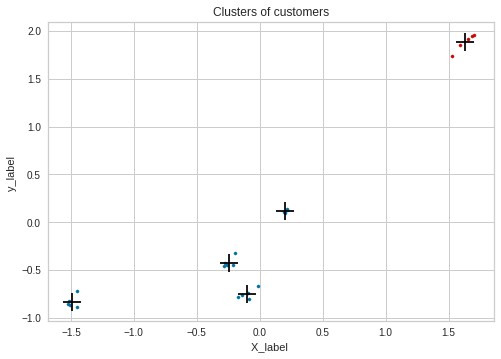

In [ ]:
plt.scatter(X_mod[pred1 == 0, 0], X_mod[pred1== 0, 1], s = 10, c = 'r')
plt.scatter(X_mod[pred1 == 1, 0], X_mod[pred1 == 1, 1], s = 10, c = 'b' )
plt.scatter(X_mod[pred1 == 2, 0], X_mod[pred1 == 2, 1], s = 10, c = 'b' )
plt.scatter(X_mod[pred1== 3, 0], X_mod[pred1 == 3, 1], s = 10, c = 'b' )
plt.scatter(X_mod[pred1== 4, 0], X_mod[pred1 == 4, 1], s = 10, c = 'b' )
#plt.scatter(data[pred == 2, 0], data[pred == 2, 1], s = 10, c = 'g' )
plt.scatter(center[:, 0], center[:, 1], s = 300, c = 'black',marker = '+')
plt.title('Clusters of customers')
plt.xlabel('X_label ')
plt.ylabel('y_label ')
plt.legend()
plt.show()

In [ ]:

ran = []

for k in range(100,200):
  fcmean=FCM(n_clusters=5,random_state=k)
  fcmean.fit(X_mod)
# Predict the hidden states corresponding to observed X.
  Z = fcmean.predict(X_mod)
  acc_hmm=accuracy_score(y1,Z)
  print("Silhouette Score for k = ", k, "is", acc_hmm)
  ran.append(acc_hmm)

Silhouette Score for k =  100 is 0.08
Silhouette Score for k =  101 is 0.72
Silhouette Score for k =  102 is 0.0
Silhouette Score for k =  103 is 0.0
Silhouette Score for k =  104 is 0.4
Silhouette Score for k =  105 is 0.0
Silhouette Score for k =  106 is 0.2
Silhouette Score for k =  107 is 0.2
Silhouette Score for k =  108 is 0.2
Silhouette Score for k =  109 is 0.4
Silhouette Score for k =  110 is 0.4
Silhouette Score for k =  111 is 0.2
Silhouette Score for k =  112 is 0.0
Silhouette Score for k =  113 is 0.2
Silhouette Score for k =  114 is 0.0
Silhouette Score for k =  115 is 0.2
Silhouette Score for k =  116 is 0.0
Silhouette Score for k =  117 is 1.0
Silhouette Score for k =  118 is 0.4
Silhouette Score for k =  119 is 0.2
Silhouette Score for k =  120 is 0.0
Silhouette Score for k =  121 is 0.2
Silhouette Score for k =  122 is 0.0
Silhouette Score for k =  123 is 0.2
Silhouette Score for k =  124 is 0.12
Silhouette Score for k =  125 is 0.6
Silhouette Score for k =  126 is 0.